In [3]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

通过新浪api获取基金数据

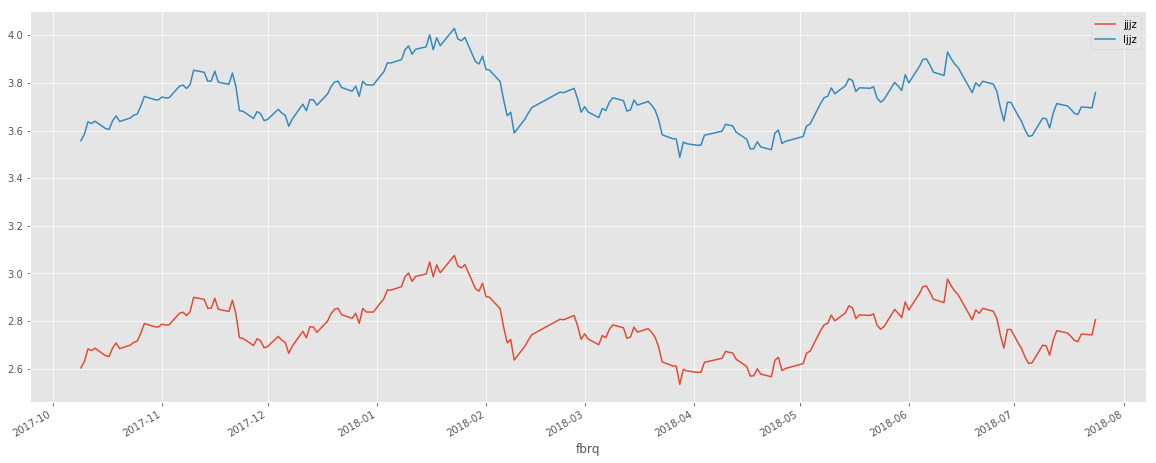

In [7]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

BASE_URL = 'http://stock.finance.sina.com.cn/fundInfo/api/openapi.php'
API_FUND_HISTORY = 'CaihuiFundInfoService.getNav'

def get_fund_data_page(symbol, date_from, date_to, page):

    full_path = '{0}/{1}?symbol={2}&datefrom={3}&dateto={4}&page={5}'.format(
        BASE_URL,
        API_FUND_HISTORY,
        symbol,
        date_from,
        date_to,
        page)

    r = requests.get(full_path)
    content = r.json()

    if content['result']['status']['code'] != 0:
        raise Exception('response status error!')

    data = content['result']['data']
    return data


def get_fund_data(symbol, date_from, date_to):
    page = 1
    total_data = []

    while True:

        data = get_fund_data_page(symbol, date_from, date_to, page)
        total_data.append(pd.DataFrame(data['data'], dtype=float))
        page += 1
        if data['data'] is None:
            break

    return total_data

frames = get_fund_data('180012', date_from='2017-10-01', date_to='2018-07-25')
result = pd.concat(frames)
result = result.drop_duplicates('fbrq')
result = result.set_index('fbrq')
result.index = pd.to_datetime(result.index)
result.plot(figsize=(20, 8))

In [21]:
result['jjjz']

fbrq
2018-07-24    2.8063
2018-07-23    2.7421
2018-07-20    2.7462
2018-07-19    2.7138
2018-07-18    2.7197
2018-07-17    2.7363
2018-07-16    2.7504
2018-07-13    2.7599
2018-07-12    2.7201
2018-07-11    2.6577
2018-07-10    2.6967
2018-07-09    2.6987
2018-07-06    2.6253
2018-07-05    2.6228
2018-07-04    2.6500
2018-07-03    2.6856
2018-07-02    2.7103
2018-06-30    2.7651
2018-06-29    2.7652
2018-06-28    2.6870
2018-06-27    2.7424
2018-06-26    2.8116
2018-06-25    2.8418
2018-06-22    2.8536
2018-06-21    2.8329
2018-06-20    2.8473
2018-06-19    2.8061
2018-06-15    2.9112
2018-06-14    2.9270
2018-06-13    2.9493
               ...  
2017-11-17    2.8499
2017-11-16    2.8962
2017-11-15    2.8543
2017-11-14    2.8541
2017-11-13    2.8914
2017-11-10    2.8999
2017-11-09    2.8403
2017-11-08    2.8234
2017-11-07    2.8375
2017-11-06    2.8334
2017-11-03    2.7842
2017-11-02    2.7840
2017-11-01    2.7877
2017-10-31    2.7754
2017-10-30    2.7765
2017-10-27    2.7899
2017-10-

`diff`函数 $out[n] = a[n+1] - a[n]$, 数组后一个数值减去前一个数值

In [22]:
all_data = result['jjjz'].sort_index()
period_return = all_data.diff()
period_return.sort_index(ascending=False)

fbrq
2018-07-24    0.0642
2018-07-23   -0.0041
2018-07-20    0.0324
2018-07-19   -0.0059
2018-07-18   -0.0166
2018-07-17   -0.0141
2018-07-16   -0.0095
2018-07-13    0.0398
2018-07-12    0.0624
2018-07-11   -0.0390
2018-07-10   -0.0020
2018-07-09    0.0734
2018-07-06    0.0025
2018-07-05   -0.0272
2018-07-04   -0.0356
2018-07-03   -0.0247
2018-07-02   -0.0548
2018-06-30   -0.0001
2018-06-29    0.0782
2018-06-28   -0.0554
2018-06-27   -0.0692
2018-06-26   -0.0302
2018-06-25   -0.0118
2018-06-22    0.0207
2018-06-21   -0.0144
2018-06-20    0.0412
2018-06-19   -0.1051
2018-06-15   -0.0158
2018-06-14   -0.0223
2018-06-13   -0.0273
               ...  
2017-11-17   -0.0463
2017-11-16    0.0419
2017-11-15    0.0002
2017-11-14   -0.0373
2017-11-13   -0.0085
2017-11-10    0.0596
2017-11-09    0.0169
2017-11-08   -0.0141
2017-11-07    0.0041
2017-11-06    0.0492
2017-11-03    0.0002
2017-11-02   -0.0037
2017-11-01    0.0123
2017-10-31   -0.0011
2017-10-30   -0.0134
2017-10-27    0.0407
2017-10-

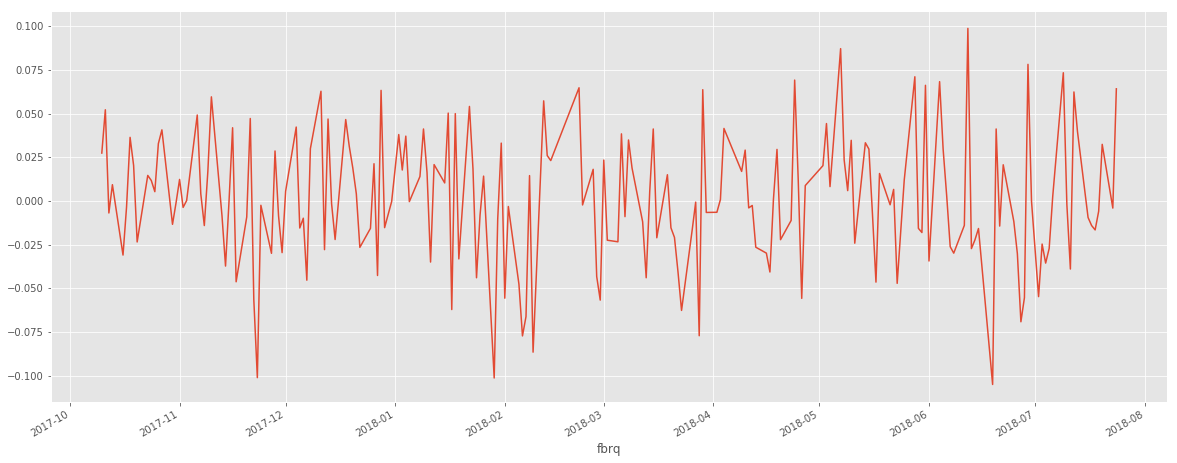

In [23]:
period_return.plot(figsize=(20,8))

`cumsum`为累加和，下表为收益走势图

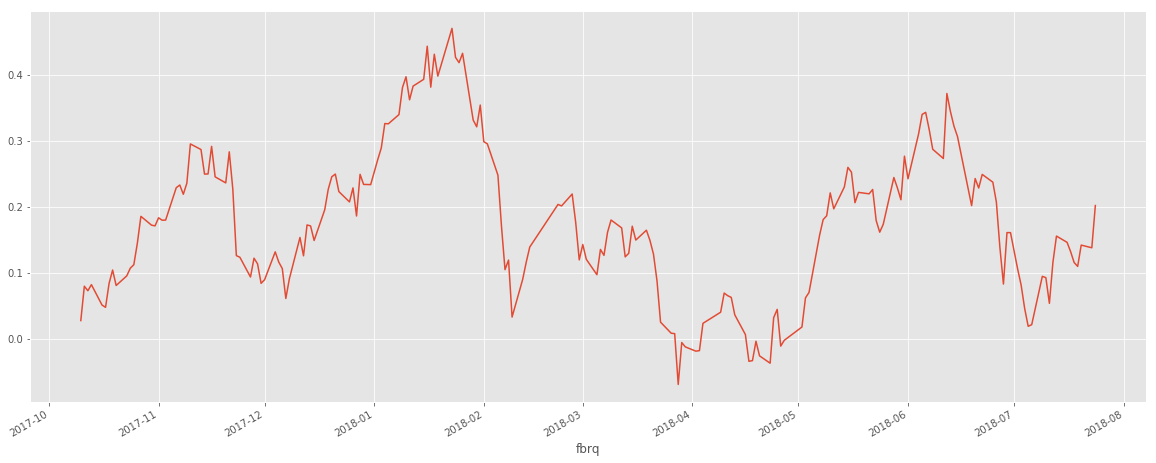

In [26]:
p_return = period_return.sort_index()
cumsum_return = p_return.cumsum()
cumsum_return.plot(figsize=(20,8))

In [30]:
jjjz = result['jjjz'].sort_index()
jjjz

fbrq
2017-10-09    2.6041
2017-10-10    2.6315
2017-10-11    2.6837
2017-10-12    2.6768
2017-10-13    2.6861
2017-10-16    2.6551
2017-10-17    2.6516
2017-10-18    2.6880
2017-10-19    2.7083
2017-10-20    2.6848
2017-10-23    2.6994
2017-10-24    2.7111
2017-10-25    2.7164
2017-10-26    2.7492
2017-10-27    2.7899
2017-10-30    2.7765
2017-10-31    2.7754
2017-11-01    2.7877
2017-11-02    2.7840
2017-11-03    2.7842
2017-11-06    2.8334
2017-11-07    2.8375
2017-11-08    2.8234
2017-11-09    2.8403
2017-11-10    2.8999
2017-11-13    2.8914
2017-11-14    2.8541
2017-11-15    2.8543
2017-11-16    2.8962
2017-11-17    2.8499
               ...  
2018-06-13    2.9493
2018-06-14    2.9270
2018-06-15    2.9112
2018-06-19    2.8061
2018-06-20    2.8473
2018-06-21    2.8329
2018-06-22    2.8536
2018-06-25    2.8418
2018-06-26    2.8116
2018-06-27    2.7424
2018-06-28    2.6870
2018-06-29    2.7652
2018-06-30    2.7651
2018-07-02    2.7103
2018-07-03    2.6856
2018-07-04    2.6500
2018-07-

In [31]:
jjjz.pct_change()

fbrq
2017-10-09         NaN
2017-10-10    0.010522
2017-10-11    0.019837
2017-10-12   -0.002571
2017-10-13    0.003474
2017-10-16   -0.011541
2017-10-17   -0.001318
2017-10-18    0.013728
2017-10-19    0.007552
2017-10-20   -0.008677
2017-10-23    0.005438
2017-10-24    0.004334
2017-10-25    0.001955
2017-10-26    0.012075
2017-10-27    0.014804
2017-10-30   -0.004803
2017-10-31   -0.000396
2017-11-01    0.004432
2017-11-02   -0.001327
2017-11-03    0.000072
2017-11-06    0.017671
2017-11-07    0.001447
2017-11-08   -0.004969
2017-11-09    0.005986
2017-11-10    0.020984
2017-11-13   -0.002931
2017-11-14   -0.012900
2017-11-15    0.000070
2017-11-16    0.014680
2017-11-17   -0.015986
                ...   
2018-06-13   -0.009172
2018-06-14   -0.007561
2018-06-15   -0.005398
2018-06-19   -0.036102
2018-06-20    0.014682
2018-06-21   -0.005057
2018-06-22    0.007307
2018-06-25   -0.004135
2018-06-26   -0.010627
2018-06-27   -0.024612
2018-06-28   -0.020201
2018-06-29    0.029103
2018-0

In [33]:
import numpy as np
log_return =   np.log(jjjz / jjjz.shift(1))
log_return

fbrq
2017-10-09         NaN
2017-10-10    0.010467
2017-10-11    0.019642
2017-10-12   -0.002574
2017-10-13    0.003468
2017-10-16   -0.011608
2017-10-17   -0.001319
2017-10-18    0.013634
2017-10-19    0.007524
2017-10-20   -0.008715
2017-10-23    0.005423
2017-10-24    0.004325
2017-10-25    0.001953
2017-10-26    0.012002
2017-10-27    0.014696
2017-10-30   -0.004815
2017-10-31   -0.000396
2017-11-01    0.004422
2017-11-02   -0.001328
2017-11-03    0.000072
2017-11-06    0.017517
2017-11-07    0.001446
2017-11-08   -0.004982
2017-11-09    0.005968
2017-11-10    0.020767
2017-11-13   -0.002935
2017-11-14   -0.012984
2017-11-15    0.000070
2017-11-16    0.014573
2017-11-17   -0.016116
                ...   
2018-06-13   -0.009214
2018-06-14   -0.007590
2018-06-15   -0.005413
2018-06-19   -0.036770
2018-06-20    0.014576
2018-06-21   -0.005070
2018-06-22    0.007280
2018-06-25   -0.004144
2018-06-26   -0.010684
2018-06-27   -0.024920
2018-06-28   -0.020408
2018-06-29    0.028688
2018-0

In [37]:
c_return = log_return.cumsum()
c_return

fbrq
2017-10-09         NaN
2017-10-10    0.010467
2017-10-11    0.030109
2017-10-12    0.027535
2017-10-13    0.031003
2017-10-16    0.019395
2017-10-17    0.018076
2017-10-18    0.031710
2017-10-19    0.039234
2017-10-20    0.030519
2017-10-23    0.035942
2017-10-24    0.040267
2017-10-25    0.042220
2017-10-26    0.054223
2017-10-27    0.068919
2017-10-30    0.064104
2017-10-31    0.063708
2017-11-01    0.068130
2017-11-02    0.066802
2017-11-03    0.066873
2017-11-06    0.084390
2017-11-07    0.085836
2017-11-08    0.080855
2017-11-09    0.086823
2017-11-10    0.107589
2017-11-13    0.104654
2017-11-14    0.091669
2017-11-15    0.091740
2017-11-16    0.106312
2017-11-17    0.090197
                ...   
2018-06-13    0.124481
2018-06-14    0.116891
2018-06-15    0.111478
2018-06-19    0.074708
2018-06-20    0.089284
2018-06-21    0.084214
2018-06-22    0.091494
2018-06-25    0.087351
2018-06-26    0.076667
2018-06-27    0.051746
2018-06-28    0.031338
2018-06-29    0.060026
2018-0

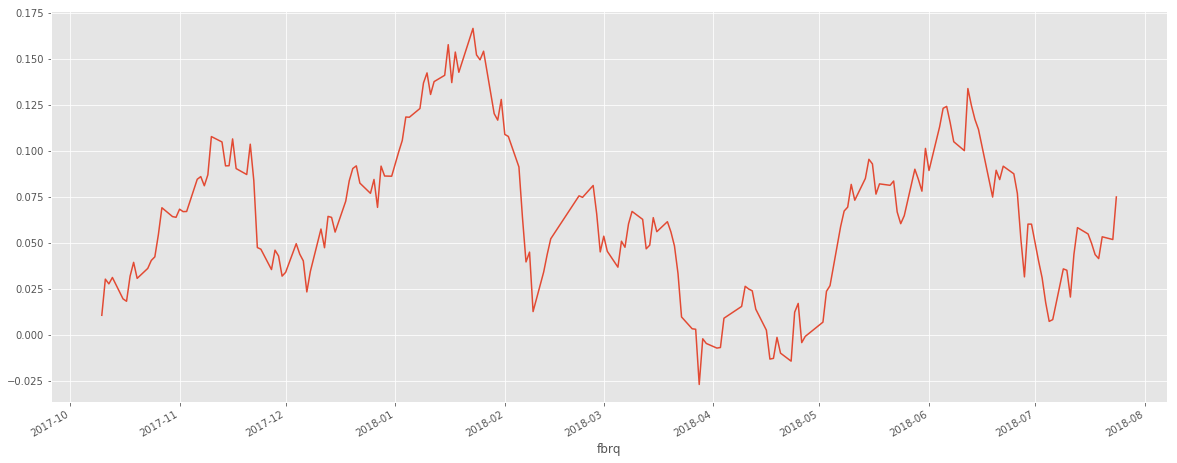

In [38]:
c_return.plot(figsize=(20, 8))

累计收益，$ln(x)=0.074780, x=1.0776$,收益为$7.76%$

In [39]:
np.exp(0.074780)

1.0776470424543205